# Capstone Project: Traffic Accident Serverity - Seattle 

## Introduction

This report looks into traffic accidents in the Seattle Area in order to help inform drivers about how different factors can contribute to server traffic accidents that can result in fatalities.

Producing a model which can predict the serverity of accidents could provide useful information to serveral stakeholders. 

Drivers can use this information to better understand how factors can increase or decrease their chances of being involved in a serious accident. This could help improve drivers performance and awareness of other on the road. 


This could also help traffic officals ensure they are prepared for severe accidents as the model may be able to predict when such accidents are more likely to occur based on the conditions. As a result they can adjust staff hours to occomodate for when sever accidents are more likely. 
Hosiptal and fire departments would be able to plan to ensure enough resources avavilable for when accidents happen. 

The data provides an account of all the information and factors which contributed to the accident and the serverity of the accidenent. 
This can be used to train a model to predict the severity of an accident using the factors from the data which will help to improve drivers understanding about the increase in serverity that factors such as weather, speed, light conditions can have on an accident. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
# downloading dataset
url = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
dataset = pd.read_csv(url, low_memory=False)
print('dataset loaded')

dataset loaded


In [4]:
# converting speeding NaN to 0
dataset['SPEEDING'] = dataset['SPEEDING'].replace(np.nan, 0)
dataset['SPEEDING'] = dataset['SPEEDING'].replace(to_replace=['Y'], value=[1])

In [5]:
dataset['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [6]:
severity_features = dataset[['SEVERITYCODE','WEATHER', 'LIGHTCOND', 'SPEEDING', 'COLLISIONTYPE', 'VEHCOUNT']]
severity_features.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,SPEEDING,COLLISIONTYPE,VEHCOUNT
0,2,Overcast,Daylight,0,Angles,2
1,1,Raining,Dark - Street Lights On,0,Sideswipe,2
2,1,Overcast,Daylight,0,Parked Car,3
3,1,Clear,Daylight,0,Other,3
4,2,Raining,Daylight,0,Angles,2


In [7]:
# removing the rows that are incomplete
severity_features = severity_features.dropna()
# seeing the size of dataset once NaN are removed


In [8]:
#removing rows where wether is unknown
severity_features = severity_features[~severity_features.WEATHER.str.contains('Unknown')]
severity_features = severity_features[~severity_features.WEATHER.str.contains('Other')]
severity_features = severity_features[~severity_features.WEATHER.str.contains('Blowing Sand/Dirt')]
severity_features = severity_features[~severity_features.WEATHER.str.contains('Partly Cloudy')]
#removing unknown values from lighcond
severity_features = severity_features[~severity_features.LIGHTCOND.str.contains('Unknown')]
severity_features = severity_features[~severity_features.LIGHTCOND.str.contains('Other')]

In [9]:
#changing weather categorical data to numerical 
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Severe Crosswind'])
severity_features.iloc[:,1] = le_weather.transform(severity_features.iloc[:,1])

In [10]:
# transforming lightcond to numerical values

le_light = preprocessing.LabelEncoder()
le_light.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn','Dark - No Street Lights', 'Dark - Street Lights Off'])
severity_features.iloc[:,2] = le_light.transform(severity_features.iloc[:,2])

In [11]:
# transforming Collision Type column to numberical values.
le_collision = preprocessing.LabelEncoder()
le_collision.fit(['Parked Car', 'Angles','Rear Ended', 'Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn', 'Head On'])
severity_features.iloc[:,4] = le_collision.transform(severity_features.iloc[:,4])

In [12]:
# resetting the index of the dataframe
severity_features.reset_index(inplace=True)

In [13]:
severity_features.drop(['index'], axis=1, inplace=True)

In [14]:
#dividing the dataframe into factors and labels

x = severity_features[['WEATHER', 'LIGHTCOND','SPEEDING','COLLISIONTYPE','VEHCOUNT']]


In [15]:
y = severity_features[['SEVERITYCODE']].values.ravel()


In [16]:
#splitting the data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=4)

In [17]:
#normalise x_train data
x_train = preprocessing.StandardScaler().fit(x_train).transform(x_train)

In [18]:
# normalise x_test data
x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test)


In [43]:
# creating graphs to initally analyse the data
# looking at weather occurences
weather_count = severity_features['WEATHER'].value_counts(normalize=True)*100
weather_count_df = weather_count.to_frame()

In [44]:
weather_count_df = weather_count_df.rename(index={0:'Clear', 1:'Fog', 2:'Overcast', 3:'Raining', 4:'Crosswind', 5:'Hail', 6:'Snow'})


Text(0, 0.5, 'Percentage')

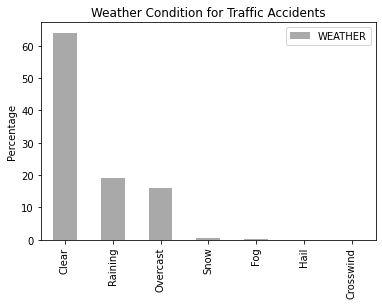

In [23]:
import matplotlib.pyplot as plt
#creating bar chart to show percentage of each weather condition 
weather_count_df.plot(kind='bar', color='darkgray', title='Weather Condition for Traffic Accidents')
plt.ylabel('Percentage')

# Models to predict accident Severity:

As the objective of this project is to be able to predict the classification of an accident using predictors. As such, classification machine learning models will be used to see which produces the most accurate results using the testing data. 

# K-Nearest Neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [34]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    severity_knn = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    knn_yhat = severity_knn.predict(x_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test,knn_yhat)
    
    std_acc[n-1] = np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

print('Results ', mean_acc )

Results  [0.66166096 0.696496   0.6740435  0.69763766 0.69702292 0.71903633
 0.71388425 0.72035362 0.7131817 ]


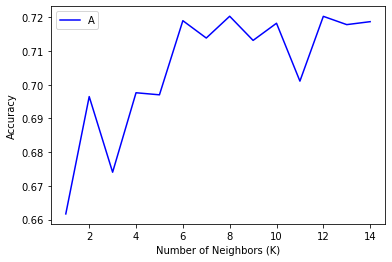

In [26]:
#chart to show which K value is most accurate
plt.plot(range(1, ks), mean_acc, 'b')
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [35]:
#the highest accuracy and k value
print('The best accuracy was', mean_acc.max(), ' with k=', mean_acc.argmax()+1)

The best accuracy was 0.7203536196247182  with k= 8


In [20]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [37]:
#KNN jaccard index and F1-score
print('KNN Jaccard Index %.2f' %jaccard_score(knn_yhat, y_test))
print('KNN F1-Score %.2f' % f1_score(y_test, knn_yhat, average='weighted'))

KNN Jaccard Index 0.67
KNN F1-Score 0.69


# Decision Tree 

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

Decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 6, min_samples_leaf= 2000)
Decision_tree.fit(x_train, y_train)
tree_yhat = Decision_tree.predict(x_test)

#evaluating Decision Tree
roc_auc_score = roc_auc_score(y_test , tree_yhat)
print('Decision Tree AUC Score ', roc_auc_score)
print('Jaccard Index %.2f' % jaccard_score(tree_yhat, y_test))
print('F1-Score %.2f ' % f1_score(tree_yhat, y_test , average='weighted'))


Decision Tree AUC Score  0.6157511810012968
Jaccard Index 0.71
F1-Score 0.78 


In [51]:
from sklearn import tree
import pydotplus
import matplotlib.image as mpImg
import graphviz
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

[Text(996.4285714285713, 2523.8571428571427, 'VEHCOUNT <= -0.814\nentropy = 0.912\nsamples = 136643\nvalue = [91949, 44694]\nclass = 0'),
 Text(398.57142857142856, 2135.5714285714284, 'COLLISIONTYPE <= 0.366\nentropy = 0.991\nsamples = 19823\nvalue = [8792, 11031]\nclass = 1'),
 Text(239.1428571428571, 1747.2857142857142, 'COLLISIONTYPE <= -0.328\nentropy = 0.989\nsamples = 14795\nvalue = [8289, 6506]\nclass = 0'),
 Text(159.42857142857142, 1359.0, 'entropy = 0.519\nsamples = 4147\nvalue = [483, 3664]\nclass = 1'),
 Text(318.85714285714283, 1359.0, 'LIGHTCOND <= -0.915\nentropy = 0.837\nsamples = 10648\nvalue = [7806, 2842]\nclass = 0'),
 Text(159.42857142857142, 970.7142857142858, 'WEATHER <= 0.44\nentropy = 0.809\nsamples = 5457\nvalue = [4100, 1357]\nclass = 0'),
 Text(79.71428571428571, 582.4285714285716, 'entropy = 0.827\nsamples = 2813\nvalue = [2081, 732]\nclass = 0'),
 Text(239.1428571428571, 582.4285714285716, 'entropy = 0.789\nsamples = 2644\nvalue = [2019, 625]\nclass = 0'),

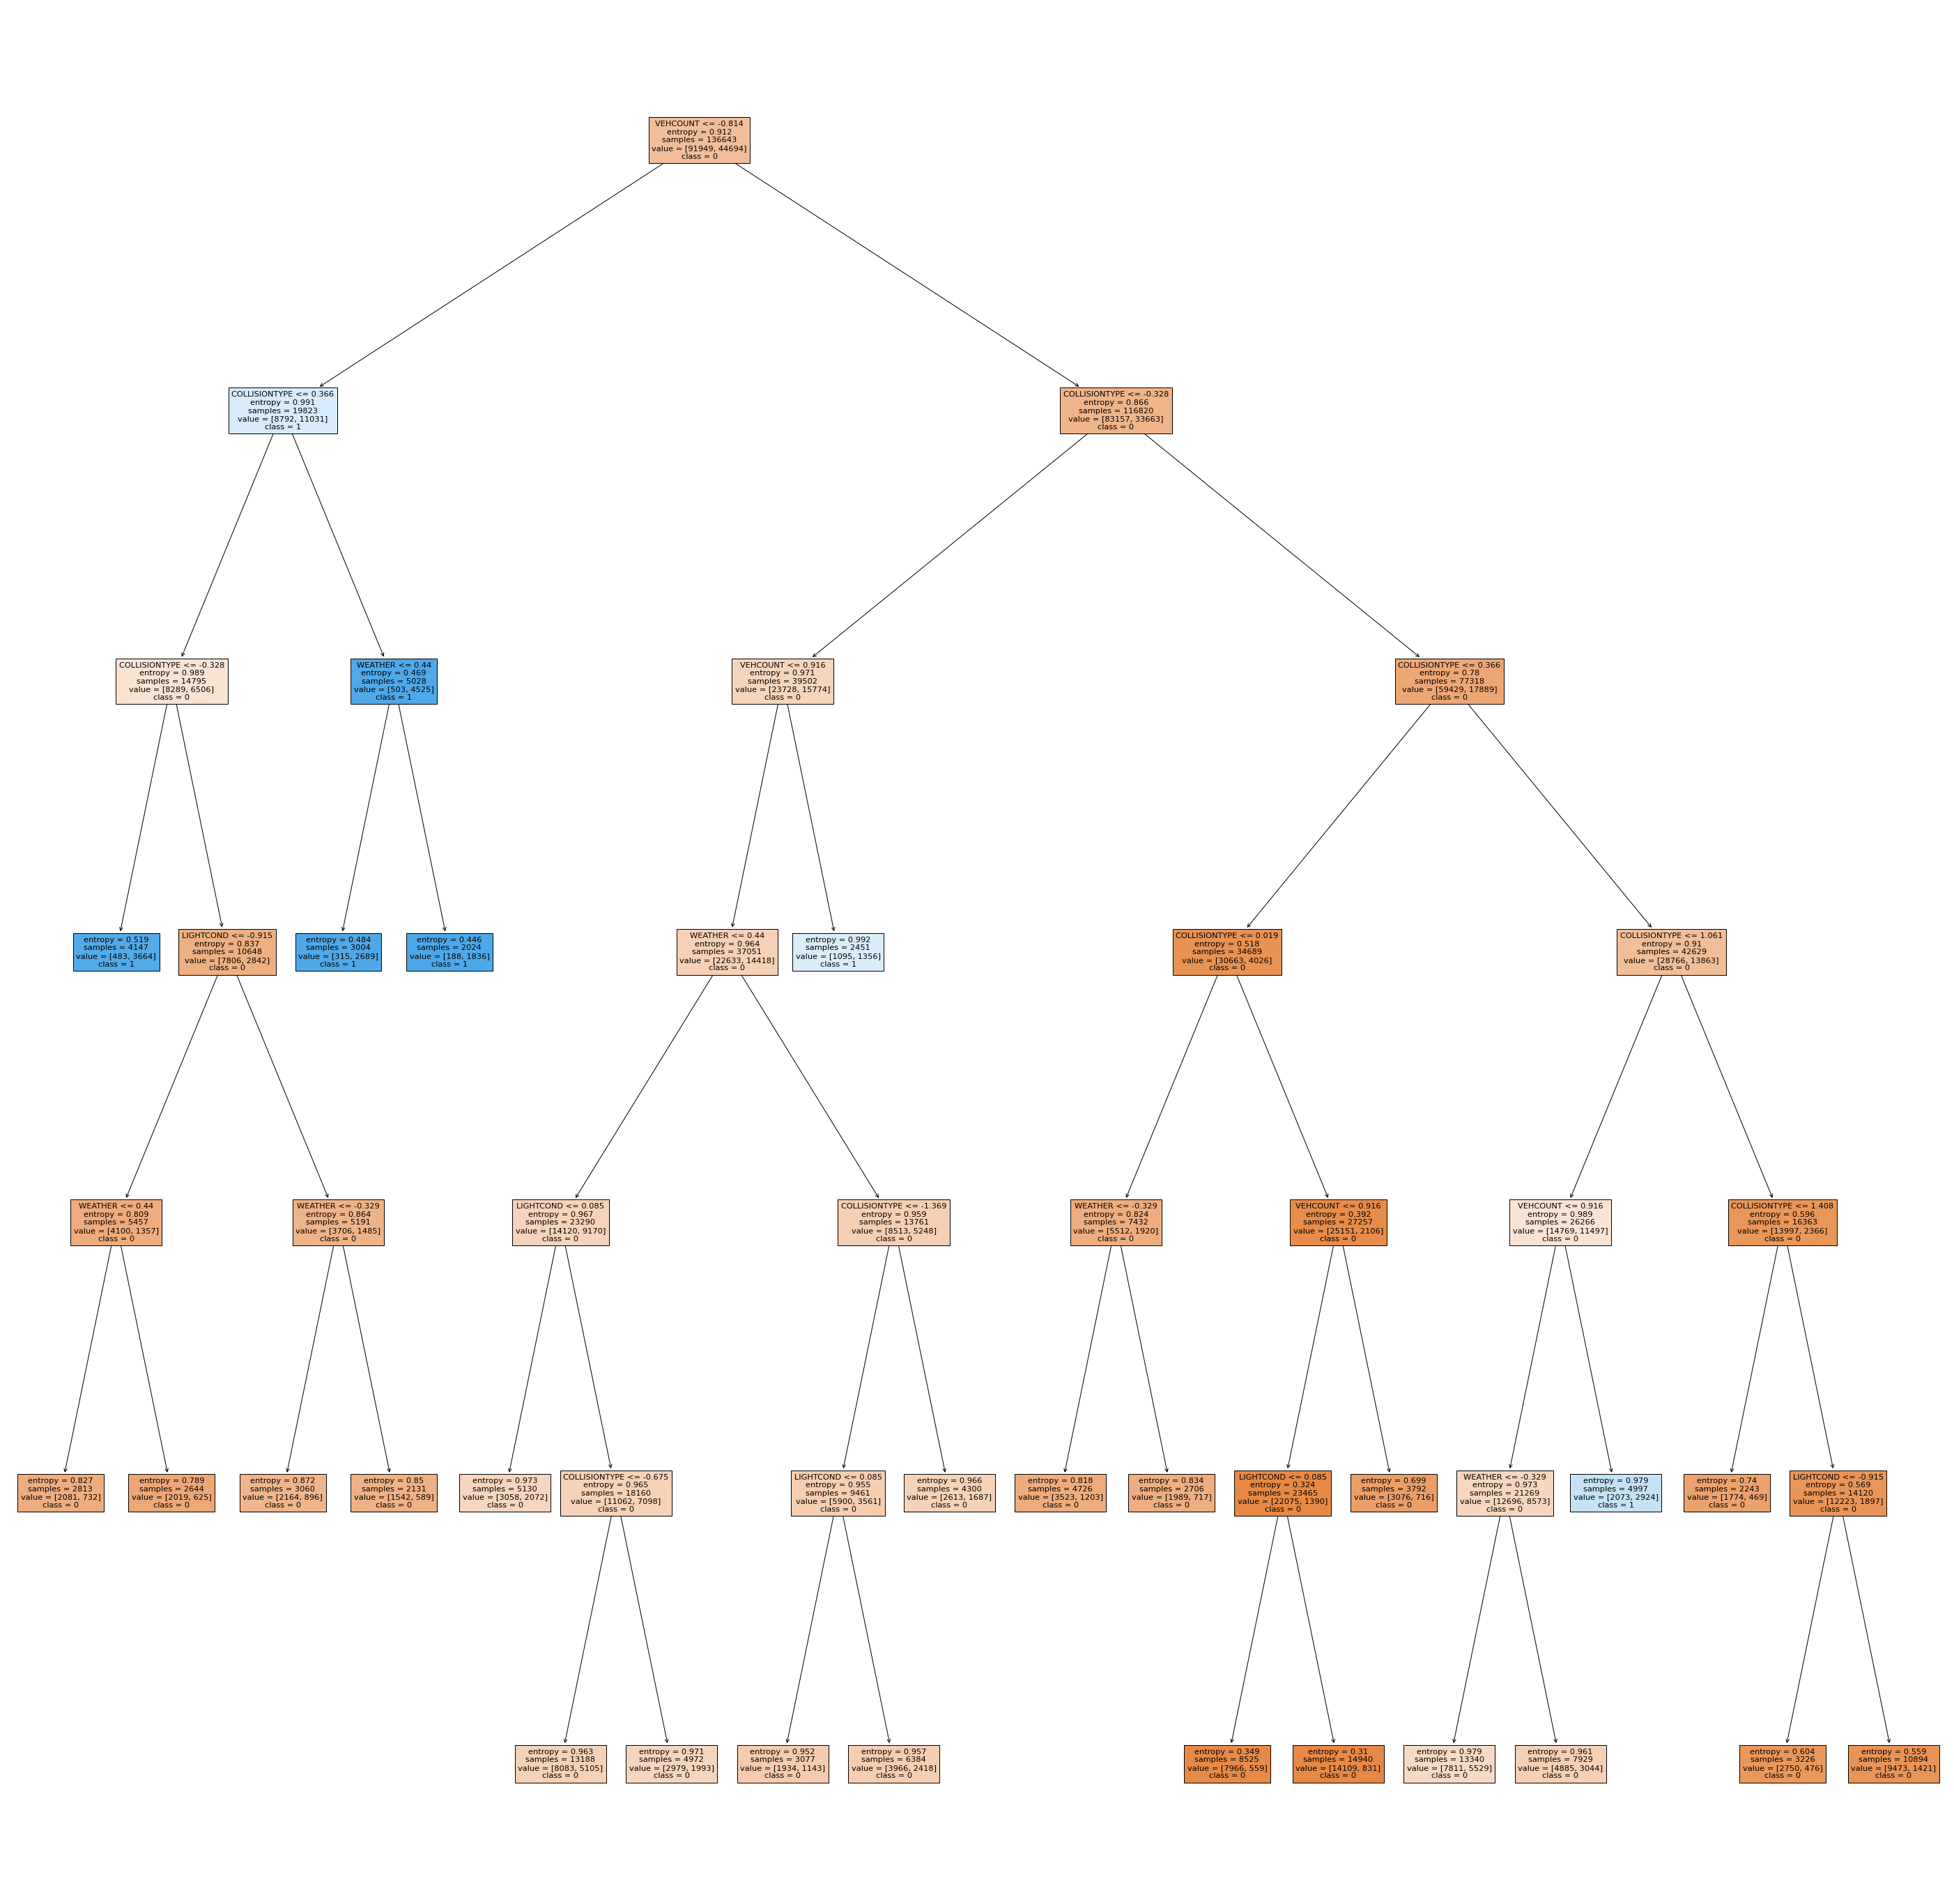

In [41]:
#Displaying the Decision tree within the notebook
features = list(x.columns)
cn = ['0','1']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(50,50))

tree.plot_tree(Decision_tree,feature_names = features, class_names=cn, filled=True)


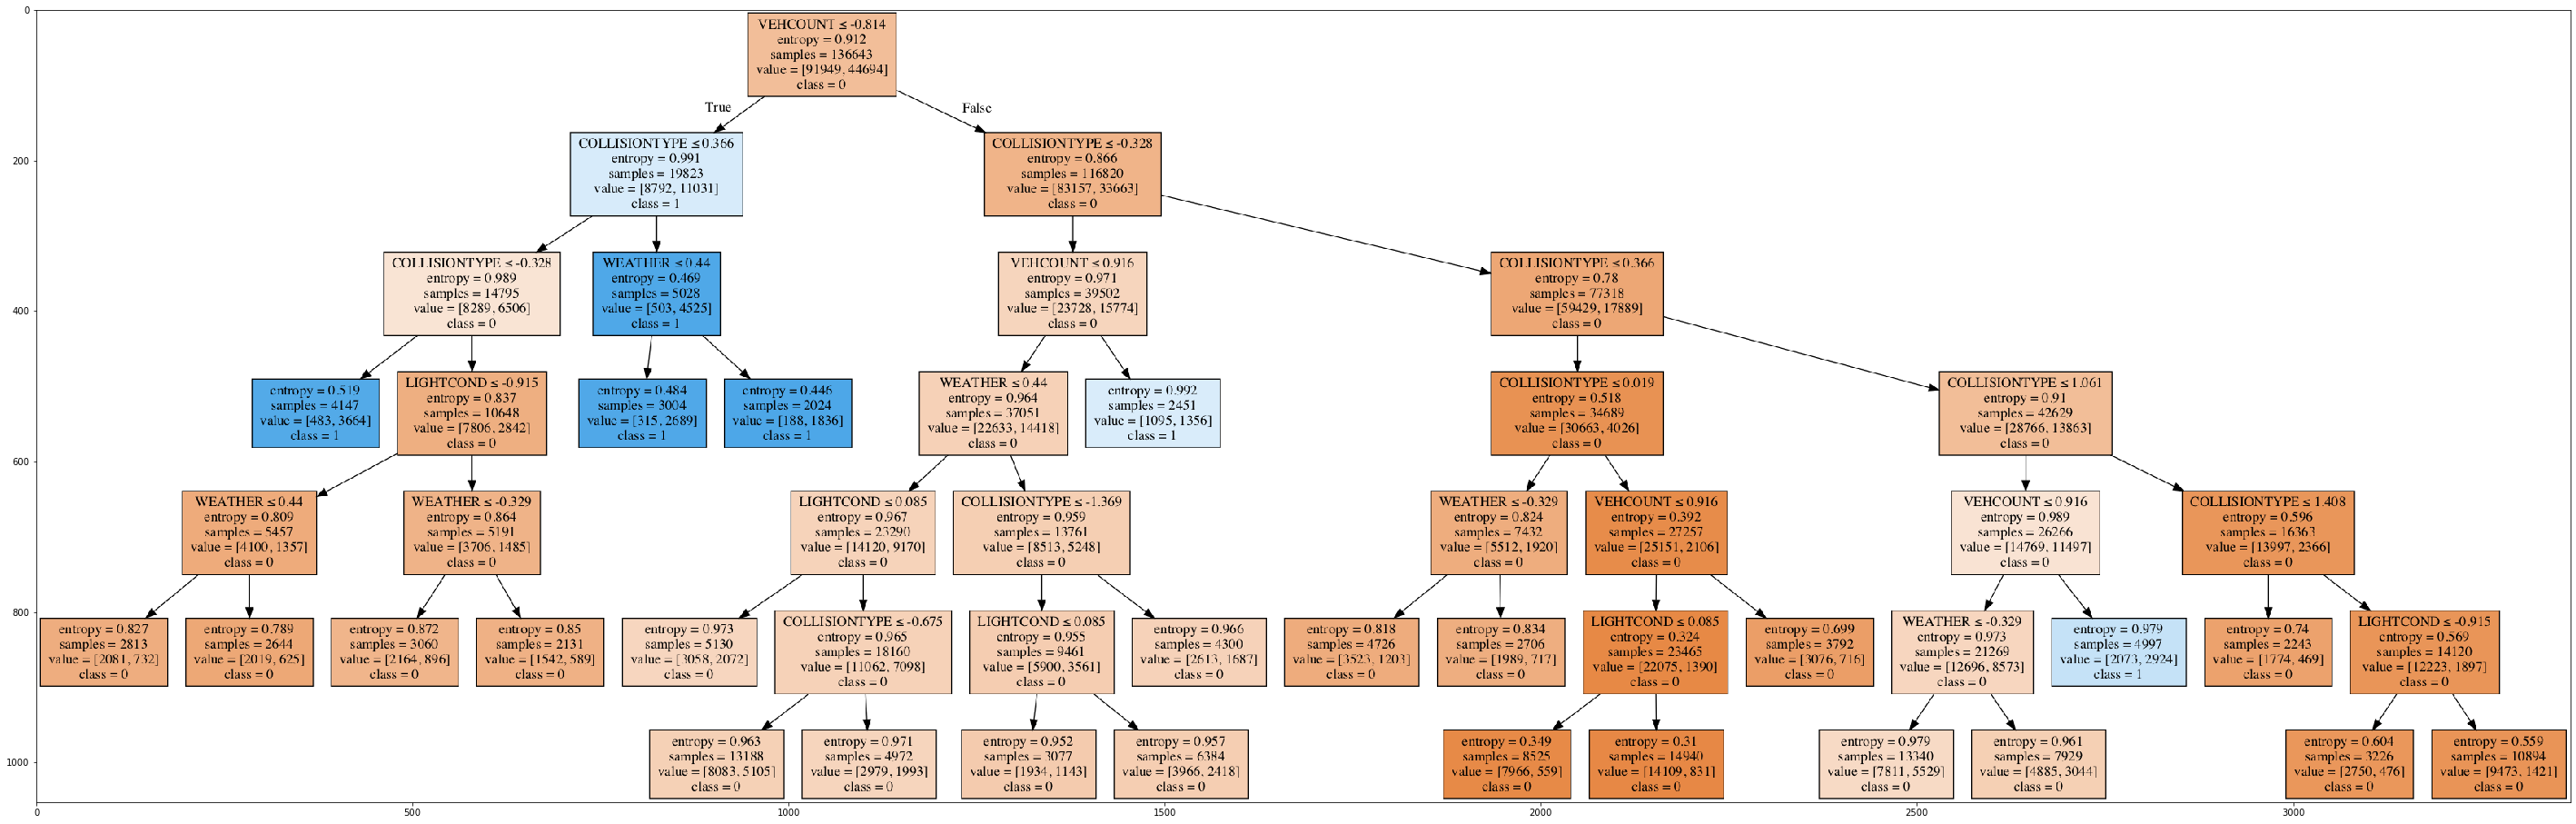

In [52]:
#creating a png file of the decision tree. 
dot_data = StringIO()
filename = 'severitytree.png'
features = list(x.columns)
targetNames = ['0','1']

out = tree.export_graphviz(Decision_tree, feature_names=features,out_file=dot_data, class_names = targetNames, filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png(filename)
img = mpImg.imread(filename)
plt.figure(figsize=(50, 100))

plt.imshow(img, interpolation='nearest')


# Support Vector machine

In [26]:
from sklearn import svm
print('imported svm')

imported svm


In [27]:
#creating Svm model
clf = svm.SVC(kernel = 'rbf')

In [28]:
#loading all the training data to fit the model was taking too long
# therefore i needed to reduce the number of datapoints
smaller_x_train = x_train[0:75000]
smaller_y_train = y_train[0:75000]
smaller_x_test = x_test[0:75000]
smaller_y_test = y_test[0:75000]

In [29]:
#fitting the model
clf.fit(smaller_x_train, smaller_y_train)

SVC()

In [30]:
svm_yhat = clf.predict(smaller_x_test)

In [31]:
print('Jaccard Score %.2f' % jaccard_score(svm_yhat, smaller_y_test))
print('f1 Score %.2f' % f1_score(svm_yhat, smaller_y_test, average='weighted'))

Jaccard Score 0.71
f1 Score 0.78


# Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR = LogisticRegression(C=0.01, solver='saga').fit(x_train, y_train)

In [55]:
lr_yhat = LR.predict(x_test)

In [56]:
lr_prob_yhat = LR.predict_proba(x_test)


In [57]:
y_test_encoded = (y_test > 1.5).astype(int)


In [59]:
print('Jaccard Score %.2f' %jaccard_score(lr_yhat,y_test))
print('Log loss %.2f'% log_loss(y_test_encoded, lr_prob_yhat))

print('F1-score %.2f'% f1_score(y_test, lr_yhat, average='weighted'))


Jaccard Score 0.68
Log loss 0.62
F1-score 0.55


# Model Selection

The two most accurate models were SVM and Decision Tree. Due to the svm taking too long to fit the data, smaller samples of the x and y values had to be used. Therefore the model that will be selected is the decision tree. 
The Decision Tree model will be trained using all of the data rather than 80%. 

In [60]:
features = x
features = preprocessing.StandardScaler().fit(features).transform(features)

final_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
final_tree.fit(features, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

The decision tree has been fit with the whole data, not only the training like previously. 